# Intermediate Pandas II

In [1]:
import pandas as pd

In [2]:
penguins = pd.read_csv("penguins.csv")

## Describe

In [3]:
#summarise dataframe
penguins.describe(include = 'all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [34]:
# average, mean
penguins['bill_length_mm'].mean()

43.9219298245614

In [35]:
# standard deviation
penguins['bill_length_mm'].std()

5.4595837139265315

In [36]:
# median
penguins['bill_length_mm'].median()

44.45

## Group By

In [37]:
# filter
penguins[penguins['species'] == 'Adelie']['bill_length_mm']

0 39.1
1 39.5
2 40.3
3 NaN
4 36.7
 ... 
147 36.6
148 36.0
149 37.8
150 36.0
151 41.5
Name: bill_length_mm, Length: 152, dtype: float64

In [38]:
# group by + sum/ mean
penguins.groupby('species')['bill_length_mm'].mean()

species
Adelie 38.791391
Chinstrap 48.833824
Gentoo 47.504878
Name: bill_length_mm, dtype: float64

## Group By Aggregation

In [39]:
penguins.groupby('species')['bill_length_mm'].agg(['min', 'mean', 'median', 'std', 'max'])

,min,mean,median,std,max
species,,,,,
Adelie,32.1,38.791391,38.80,2.663405,46.0
Chinstrap,40.9,48.833824,49.55,3.339256,58.0
Gentoo,40.9,47.504878,47.30,3.081857,59.6


In [40]:
# group by mpore than one colume
result = penguins.groupby(['island', 'species'])['bill_length_mm'].agg(['min', 'mean', 'max']).reset_index()
result.to_csv('result.csv')

## If Your Code is Long

In [41]:
penguins.groupby(['island', 'species'])['bill_length_mm']\
    .agg(['min', 'mean', 'max'])\
        .reset_index()

,island,species,min,mean,max
0,Biscoe,Adelie,34.5,38.975000,45.6
1,Biscoe,Gentoo,40.9,47.504878,59.6
2,Dream,Adelie,32.1,38.501786,44.1
3,Dream,Chinstrap,40.9,48.833824,58.0
4,Torgersen,Adelie,33.5,38.950980,46.0


## Map

In [42]:
# map values MALE: m, FEMALE: f
# penguins['sex'].head()

penguins['sex_new'] = penguins['sex'].map( {'MALE': 'm', 'FEMALE': 'f'} ).fillna('other')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_new
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,m
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,f
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,f
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,other
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,f


## Numpy

In [43]:
# Pandas style
penguins['bill_length_mm'].mean()

43.9219298245614

In [44]:
# numpy
import numpy as np
np.mean(penguins['bill_length_mm'])

43.9219298245614

In [45]:
# other function of numpy
print(np.sum(penguins['bill_depth_mm']))
print(np.std(penguins['bill_depth_mm']))

5865.700000000001
1.9719039187562526


## Where

In [46]:
score = pd.Series([80, 55, 62, 95, 20])

In [47]:
print(score)

0    80
1    55
2    62
3    95
4    20
dtype: int64


In [48]:
# numpy where
grade = np.where(score >= 80, "passed", "failed")
print(grade)

['passed' 'failed' 'failed' 'passed' 'failed']


In [49]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_new
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,m
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,f
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,f
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,other
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,f


In [50]:
df = penguins.query("species == 'Adelie' ")[['species', 'island', 'bill_length_mm']].dropna()

In [51]:
df['new_column'] = np.where(df['bill_length_mm'] > 40, True, False) # boolean

In [52]:
df.head(10)

,species,island,bill_length_mm,new_column
0,Adelie,Torgersen,39.1,False
1,Adelie,Torgersen,39.5,False
2,Adelie,Torgersen,40.3,True
4,Adelie,Torgersen,36.7,False
5,Adelie,Torgersen,39.3,False
6,Adelie,Torgersen,38.9,False
7,Adelie,Torgersen,39.2,False
8,Adelie,Torgersen,34.1,False
9,Adelie,Torgersen,42.0,True
10,Adelie,Torgersen,37.8,False


## Merge Dataframe

In [4]:
left = {
    'key': [1, 2, 3, 4],
    'name': ['mon', 'toy', 'jane', 'anna'],
    'age': [21, 28, 30, 25]
}

right = {
    'key': [1, 2, 3, 4],
    'city': ['Bangkok', 'London', 'Seoul', 'Tokyo'],
    'age': [1001, 2504, 2094, 9802]
}

df_left = pd.DataFrame(left)
df_right = pd.DataFrame(right)

In [6]:
df_result = pd.merge(df_left, df_right, on = 'key')

df_result

,key,name,age_x,city,age_y
0,1,mon,21,Bangkok,1001
1,2,toy,28,London,2504
2,3,jane,30,Seoul,2094
3,4,anna,25,Tokyo,9802


## Intro to Pandas Plots

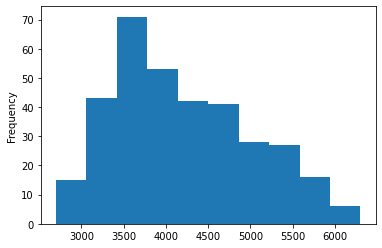

In [55]:
## Plot graph in Pandas
# histogram one column

penguins['body_mass_g'].plot(kind = 'hist');

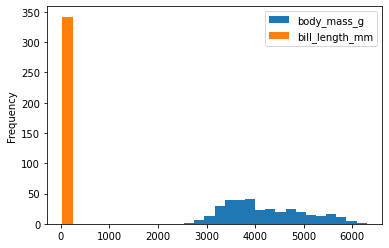

In [56]:
# histogram two columns
penguins[['body_mass_g', 'bill_length_mm']].plot(kind = 'hist', bins = 30);

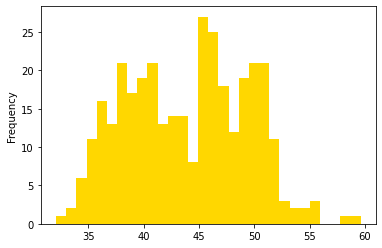

In [57]:
penguins['bill_length_mm'].plot(kind = 'hist', bins = 30, color = 'gold');

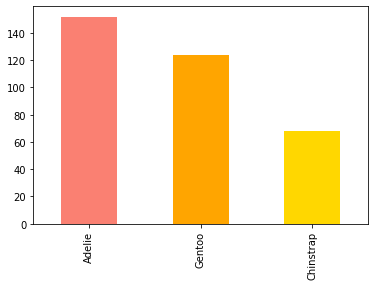

In [58]:
# bar plot (must aggregate data first)
penguins['species'].value_counts()\
    .plot(kind = 'bar', color = ['salmon', 'orange', 'gold']);

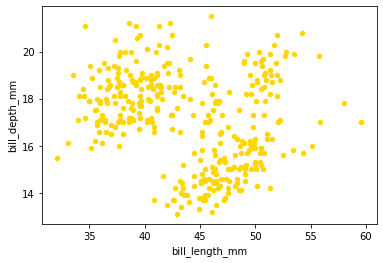

In [59]:
# scatter plot (fing the coorelation of data)
penguins[['bill_length_mm', 'bill_depth_mm']]\
    .plot(x = 'bill_length_mm', y = 'bill_depth_mm', kind = 'scatter', color = 'gold');

## DataLore Visualization

In [60]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_new
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,m
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,f
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,f
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,other
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,f
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,other
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,f
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,m
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,f
